## Re-sampling the dataset

Dealing with imbalanced datasets includes various strategies such as Synthetic Minority Over-sampling Technique (SMOTE is an oversampling method which creates “synthetic” example rather than oversampling by replacements. The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors. Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen).

##### Resources:

https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [1]:
# Import libraries necessary for this part of the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the Santander Customer Satisfacations data from a CSV file

data = pd.read_csv('Data/processed_dataset.csv')

In [3]:
# Class count
count_class_0, count_class_1 = data.TARGET.value_counts()
print ('class_0 : {}'.format(count_class_0))
print ('class_1 : {}'.format(count_class_1))

class_0 : 73012
class_1 : 3008


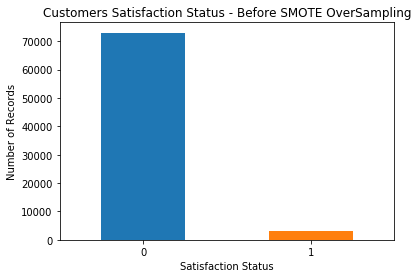

In [4]:
# Plot Satisfaction Status

data.TARGET.value_counts().plot(kind='bar', title='Count (target)',rot=0)
plt.title('Customers Satisfaction Status - Before SMOTE OverSampling')
plt.xlabel('Satisfaction Status')
plt.ylabel('Number of Records')
plt.show();

#### Split Data

In [5]:
# Import train_test_split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# split data to features and Target
features = data[['Dimension 1','Dimension 2','Dimension 3', 'Dimension 4','Dimension 5',\
            'Dimension 6','Dimension 7', 'Dimension 8','Dimension 9', 'Dimension 10',\
            'Dimension 11','Dimension 12']]

satisfaction_status = data['TARGET']

In [6]:
#Split the data into train and test sets
training_features, test_features, training_target, test_target, = \
train_test_split(features,satisfaction_status,test_size = .30,random_state=12)

# oversampling the training data.
x_train, x_val, y_train, y_val =\
train_test_split(training_features, training_target,test_size = .30,random_state=12)

sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [7]:
print('x_train_res:',len(x_train_res)) 
print('y_train_res:',len(y_train_res))

x_train_res: 71510
y_train_res: 71510


In [8]:
SMOTE_over = np.concatenate((x_train_res,y_train_res[:,None]),axis=1)
pd_SMOTE_over = pd.DataFrame(data=SMOTE_over[1:,1:])

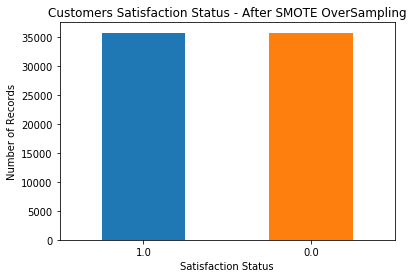

In [9]:
# Plot Satisfaction Status

pd_SMOTE_over[11].value_counts().plot(kind='bar', title='Count (target)',rot=0)
plt.title('Customers Satisfaction Status - After SMOTE OverSampling')
plt.xlabel('Satisfaction Status')
plt.ylabel('Number of Records')
plt.show();

In [10]:
# Method to plot the ROC curve
def ROC_Score (y_test , predictions_test):
    from sklearn.metrics import roc_curve
    
    print('ROC Curve')
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, predictions_test)

    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    
    # show the plot
    plt.show()

In [11]:
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

# Method to train & predict & evaluate the performance
def predictions (learner,training_features, test_features, training_target, test_target):
    clf_rf = learner.fit(training_features, training_target)
    predictions = clf_rf.predict(test_features)
    
    print("{} has trained . . . .".format(learner.__class__.__name__))
        #confusion matrix    
    confusion_df = pd.DataFrame(confusion_matrix(test_target, predictions),\
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],\
             index = ["Class " + str(class_name) for class_name in [0,1]])
    print('Confusion Matrix :')
    print(confusion_df,'\n')
    print('Classifying Report :')
    classifying_report = classification_report(test_target, predictions)
    print(classifying_report)
    print('Accuracy Score:',accuracy_score(test_target, predictions))
    print('Score: ',clf_rf.score(test_features, test_target))
    print('Fbeta Score:',fbeta_score(test_target, predictions, beta=0.5))
    print('Recall: ',recall_score(test_target, predictions))
    print('AUC: ',roc_auc_score(test_target, predictions))
    ROC_Score (test_target, predictions)
    print('---------------------------------------------------------------------------------')
   

-  1  -



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier has trained . . . .
Confusion Matrix :
         Predicted Class 0  Predicted Class 1
Class 0              21645                293
Class 1                854                 14 

Classifying Report :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     21938
           1       0.05      0.02      0.02       868

   micro avg       0.95      0.95      0.95     22806
   macro avg       0.50      0.50      0.50     22806
weighted avg       0.93      0.95      0.94     22806

Accuracy Score: 0.9497062176620188
Score:  0.9497062176620188
Fbeta Score: 0.033396946564885496
Recall:  0.016129032258064516
AUC:  0.5013866056540573
ROC Curve


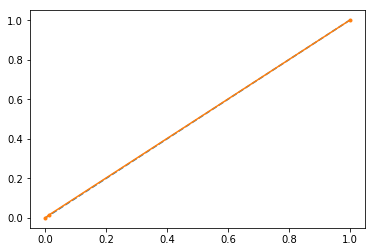

---------------------------------------------------------------------------------
-  2  -

GaussianNB has trained . . . .
Confusion Matrix :
         Predicted Class 0  Predicted Class 1
Class 0                149              21789
Class 1                  2                866 

Classifying Report :
              precision    recall  f1-score   support

           0       0.99      0.01      0.01     21938
           1       0.04      1.00      0.07       868

   micro avg       0.04      0.04      0.04     22806
   macro avg       0.51      0.50      0.04     22806
weighted avg       0.95      0.04      0.02     22806

Accuracy Score: 0.044505831798649476
Score:  0.044505831798649476
Fbeta Score: 0.04732861140258831
Recall:  0.9976958525345622
AUC:  0.5022438602630874
ROC Curve


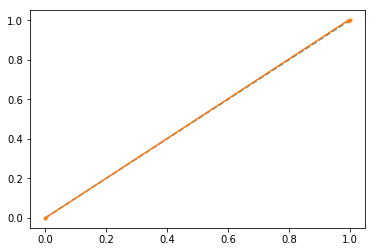

---------------------------------------------------------------------------------
-  3  -



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression has trained . . . .
Confusion Matrix :
         Predicted Class 0  Predicted Class 1
Class 0                143              21795
Class 1                  2                866 

Classifying Report :
              precision    recall  f1-score   support

           0       0.99      0.01      0.01     21938
           1       0.04      1.00      0.07       868

   micro avg       0.04      0.04      0.04     22806
   macro avg       0.51      0.50      0.04     22806
weighted avg       0.95      0.04      0.02     22806

Accuracy Score: 0.04424274313777076
Score:  0.04424274313777076
Fbeta Score: 0.0473161989684413
Recall:  0.9976958525345622
AUC:  0.5021071112431221
ROC Curve


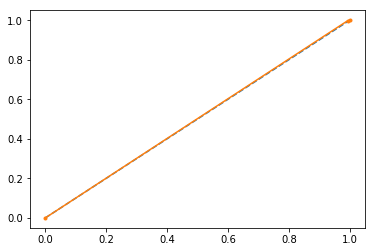

---------------------------------------------------------------------------------
-  4  -

DecisionTreeClassifier has trained . . . .
Confusion Matrix :
         Predicted Class 0  Predicted Class 1
Class 0              21482                456
Class 1                854                 14 

Classifying Report :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21938
           1       0.03      0.02      0.02       868

   micro avg       0.94      0.94      0.94     22806
   macro avg       0.50      0.50      0.50     22806
weighted avg       0.93      0.94      0.93     22806

Accuracy Score: 0.942558975708147
Score:  0.942558975708147
Fbeta Score: 0.025473071324599708
Recall:  0.016129032258064516
AUC:  0.4976715906116651
ROC Curve


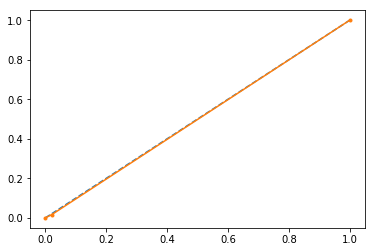

---------------------------------------------------------------------------------


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize the four models
clf_A = RandomForestClassifier(random_state=42)
clf_B = GaussianNB()
clf_C = LogisticRegression(random_state=42)
clf_D = DecisionTreeClassifier()

# Collect results on the learners
num = 1
for clf in [clf_A, clf_B, clf_C, clf_D]:
    print ('- ',num,' -\n')
    clf_name = clf.__class__.__name__
    predictions(clf,training_features, test_features, training_target, test_target)
    num =num+1